# PubReporter

In [1]:
%config IPCompleter.use_jedi = False
%load_ext autoreload
%autoreload 2
%matplotlib inline
client_name = "Sirona"

from IPython.display import Markdown as md
md("## Publications Report: "+client_name) 

## Publications Report: Sirona

__Author__: *Brian M. Schilder*

<hr>


### Pipeline Summary 
1. __Gather all publications keyword list:__
  - Gather all relevant info on each resulting publication (e.g. title, year, abstract, authors).

2. __Gather a list of papers that cited each of these publications. Then for each paper:__
   - Calculate the number of citations.
   - Calculate the number of citations per month (to adjust for the fact that newer publications have had less time to be cited).
   - Save results as an Excel file. 
    
3. __Calculate__:
    - The most highly cited publications.
    - The journals in which the publications tended to get the most citations.
    - Most frequent terms within the publication Titles, Abstracts and MeSH terms.
    - Authors that cited the publications the most.
    - Institutions that cited the publications the most.
    

In [44]:
# Increase fig resolution
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300 
plt.rcParams['savefig.dpi'] = 300

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('jpg', 'pdf')

import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("whitegrid") 

import os
os.chdir("/Users/schilder/Desktop/120-80/PubReporter/")
%pwd

'/Users/schilder/Desktop/120-80/PubReporter'

In [38]:
import Python.PubReporter_main as PR
from IPython.display import display, HTML
from itables import show
import pandas as pd
import warnings
import plotly.express as px

# get_ipython().magic('matplotlib inline')
from datetime import datetime
date = datetime.today().strftime('%m-%d-%Y')
# print("Last Date Modifed:", date)
md("**Last Date Modifed**: {}".format(date))

**Last Date Modifed**: 04-06-2021

## Gather Data

### Keywords to Query

In [6]:
baseURL = "./Jupyter_Reports/"+client_name.replace(" ","")+"/"
resultsURL = baseURL + "Keyword_Results/"

keywords = pd.read_csv(baseURL+"/keyword_list2.csv")
keywords.Keyword = [x.lower() for x in keywords.Keyword]
keywords = keywords.loc[keywords.Remove!=True,:]
keywords

Keyword           Group  \
1      radiologist productivity vs. efficiency     Money words   
2                       radiologist efficiency     Money words   
3                       radiologist experience     Money words   
4                              user experience     Money words   
5                  radiologist user experience     Money words   
6                       radiologist reputation     Money words   
7                saas-based workflow solutions     Money words   
8               cloud-based workflow solutions     Money words   
9                          radiologist-centric     Money words   
10                          radiology workflow     Money words   
11                                    workflow     Money words   
12                            value-based care     Money words   
13                            avoidable errors     Money words   
14                                    worklist     Money words   
15                                      viewer     Money words   
18                          radiology practice     Money words   
19                         practice operations     Money words   
20                       business of radiology     Money words   
22                                radiology it      Categories   
24                                        pacs      Categories   
25                  radiology operating system      Categories   
26                          radiology workflow      Categories   
27                   intelligent amplification      Categories   
29                enterprise imaging solutions      Categories   
30                         radiology reporting      Categories   
31                           voice recognition      Categories   
32         voice driven clinical documentation      Categories   
33                          radiology platform      Categories   
34                                          ux  Major Concepts   
35                             user experience  Major Concepts   
36                          integrated toolset  Major Concepts   
37                         integrated workflow  Major Concepts   
38                           work satisfaction  Major Concepts   
39                  intelligence amplification  Major Concepts   
40                                     viewing           Other   
41                                   usability           Other   
42                      unnecessary treatments           Other   
43                         incidental findings           Other   
44                              user interface           Other   
45                                 workarounds           Other   
46                                  efficiency           Other   
47                               reimbursement           Other   
48  picture archiving and communication system           Other   
49         picture archiving and communication           Other   

            Source Remove  
1       Rob Cronin    NaN  
2       Rob Cronin    NaN  
3       Rob Cronin    NaN  
4   Brian Schilder    NaN  
5       Rob Cronin    NaN  
6       Rob Cronin    NaN  
7       Rob Cronin    NaN  
8       Rob Cronin    NaN  
9       Rob Cronin    NaN  
10      Rob Cronin    NaN  
11      Rob Cronin    NaN  
12      Rob Cronin    NaN  
13      Rob Cronin    NaN  
14      Rob Cronin    NaN  
15      Rob Cronin    NaN  
18      Rob Cronin    NaN  
19      Rob Cronin    NaN  
20      Rob Cronin    NaN  
22      Rob Cronin    NaN  
24      Rob Cronin    NaN  
25      Rob Cronin    NaN  
26      Rob Cronin    NaN  
27      Rob Cronin    NaN  
29      Rob Cronin    NaN  
30      Rob Cronin    NaN  
31      Rob Cronin    NaN  
32      Rob Cronin    NaN  
33      Rob Cronin    NaN  
34      Rob Cronin    NaN  
35      Rob Cronin    NaN  
36      Rob Cronin    NaN  
37      Rob Cronin    NaN  
38      Rob Cronin    NaN  
39      Rob Cronin    NaN  
40    Alex Jenkins    NaN  
41    Alex Jenkins    NaN  
42    Alex Jenkins    NaN  
43  

In [7]:
companies = pd.read_csv(baseURL+"company_list.csv")
companies.Modifiers2 = [x.lower() for x in companies.Modifiers2]
groupDict = dict(zip(companies.Company, companies.Group))

### Find Publications by Queries

In [19]:
warnings.filterwarnings('ignore')
# publications_df = PR.generate_publications_report(query=companies.Modifiers2[0]+" AND (imaging workflow OR radiology workflow OR radiologist workflow OR radiologist’s workflow OR exam workflow OR clinician workflow OR physician workflow)", 
#                                                  #query="(imaging workflow OR radiology workflow OR radiologist workflow OR exam workflow OR clinician workflow OR physician workflow)", 
#                                                   retmax=1000,
#                                                   quotes=False,
#                                                   search_type="keyword",
#                                                   write_file=True,
#                                                   output_path=resultsURL)
publications_df = pd.read_csv(resultsURL+"PublicationsQuery.csv.gz", index_col=0) 
print("DATA COLLECTION COMPLETE.")
print(publications_df.shape[0],"publications collected.")

DATA COLLECTION COMPLETE.
998 publications collected.


/opt/anaconda3/envs/PubReporter/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [114]:
companies.Modifiers2[0]+" AND (imaging workflow OR radiology workflow OR radiologist workflow OR radiologist’s workflow OR exam workflow OR clinician workflow OR physician workflow)"

'(imaging OR radiolog) AND (Radiologist productivity vs. efficiency OR Radiologist efficiency OR Radiologist experience OR user experience OR Radiologist user experience OR Radiologist reputation OR Saas-based workflow solutions OR Cloud-based workflow solutions OR Radiologist-centric OR Radiology workflow OR workflow OR value-based care OR avoidable errors OR worklist OR viewer OR Radiology practice OR Practice operations OR business of radiology OR Radiology IT OR PACS OR Radiology operating system OR Radiology Workflow OR Intelligent amplification OR Enterprise imaging solutions OR Radiology Reporting OR Voice Recognition OR Voice driven clinical documentation OR Radiology Platform OR UX OR User Experience OR Integrated toolset OR Integrated workflow OR Work satisfaction OR Intelligence Amplification OR viewing OR usability OR unnecessary treatments OR incidental findings OR user interface OR workarounds OR efficiency OR reimbursement) AND (imaging workflow OR radiology workflow OR 

#### Filter Publications

In [20]:
publications_df = PR.filter_publications_report(publications_df, 
                                                keyword_list=keywords["Keyword"].tolist(),
                                                exclusion_list=["surgical","surgery"]) 

767 / 998 publications remain after filtering.


In [21]:
publications_df

pmid                             DOI  \
33791909  33791909      10.1007/s10278-021-00441-6   
33785609  33785609              10.1242/jcs.254151   
33783668  33783668      10.1007/s12021-021-09520-z   
33780335  33780335        10.1109/TMI.2021.3069471   
33779153  33779153    10.1021/acs.analchem.0c05383   
...            ...                             ...   
31962324  31962324               10.1159/000504945   
31959888  31959888      10.1038/s41598-020-57536-3   
31959396  31959396  10.1016/j.prosdent.2019.10.029   
31958630  31958630     10.1016/j.ejrad.2020.108837   
31956529  31956529        10.21037/qims.2019.10.16   

                                                      title  \
33791909  Artificial Intelligence to Assist in Exclusion...   
33785609  A guide to accurate reporting in digital image...   
33783668  A Comparative Analysis of MRI Automated Segmen...   
33780335  Temporal Memory Relation Network for Workflow ...   
33779153  In Situ Identification and Spatial Mapping of ...   
...                                                     ...   
31962324  Utilization of the Intraoperative Mobile AIRO®...   
31959888  Improved multiparametric scrape loading-dye tr...   
31959396  Digital workflow: In vitro accuracy of 3D prin...   
31958630  Convolutional neural network-automated hepatob...   
31956529  Rapid determination of internal strains in sof...   

                                                   abstract  \
33791909  Coronary computed tomography angiography (CCTA...   
33785609  Considerable attention has been recently paid ...   
33783668  In this study, we perform a comparative analys...   
33780335  Automatic surgical workflow recognition is a k...   
33779153  Microplastics (MPs) are universally present in...   
...                                                     ...   
31962324  In frame-based stereotactic surgery, intraoper...   
31959888  Gap junctional intercellular communication (GJ...   
31959396  Data on the accuracy of printed casts from com...   
31958630  To develop and evaluate the performance of a f...   
31956529  Finite element models (FEMs) of medical images...   

                                                    authors  \
33791909  Richard D White;;Barbaros S Erdal;;Mutlu Demir...   
33785609                       Jesse Aaron;;Teng-Leong Chew   
33783668  Jaime Gomez-Ramirez;;Javier Quilis-Sancho;;Mig...   
33780335  Yueming Jin;;Yonghao Long;;Cheng Chen;;Zixu Zh...   
33779153  Jiaxin Feng;;Hansen Zhao;;Xiaoyun Gong;;Meng-C...   
...                                                     ...   
31962324  Katharina Faust;;Gerd-Helge Schneider;;Peter V...   
31959888  Aneta Dydowiczová;;Ondřej Brózman;;Pavel Babic...   
31959396  Panos Papaspyridakos;;Yo-Wei Chen;;Bahaa Alsha...   
31958630  Guilherme Moura Cunha;;Kyle A Hasenstab;;Atsus...   
31956529  Dong Hwan E Yoon;;Christian I Weber;;Garrett W...   

                          last_author  \
33791909         Luciano M Prevedello   
33785609              Teng-Leong Chew   
33783668  Miguel A Fernandez-Blazquez   
33780335               Pheng-Ann Heng   
33779153                 Sichun Zhang   
...                               ...   
31962324               Peter Vajkoczy   
31959888               Iva Sovadinová   
31959396             Hans-Peter Weber   
31958630               Katie J Fowler   
31956529                 Simon Y Tang   

                                               affiliations  \
33791909  Department of Radiology, Ohio State University...   
33785609  Advanced Imaging Center, Howard Hughes Medical...   
33783668  Instituto de Salud Carlos III, Centro de Alzhe...   
33780335                                                NaN   
33779153  Mass Spectrometry Engineering Technology Resea...   
...                                                     ...   
31962324  Department of Neurosurgery, Charité University...   
31959888  Masaryk University, Faculty of Science, RECETO...   
31959396  Assistant Professor, Div

In [11]:
PR.download_link(resultsURL+"PublicationsQuery.csv.gz")

### Find Papers that Cited those Publications

In [12]:
warnings.filterwarnings('ignore')
# citations_df = PR.generate_citations_report(publications_df["pmid"],
#                                             write_file=True, 
#                                             output_path=resultsURL)
citations_df = pd.read_csv(resultsURL+"CitationsQuery.csv.gz", index_col=0) 
print("DATA COLLECTION COMPLETE.")
print(citations_df.shape[0],"citations collected.")

+ Gathering data for 767 publications...


/Users/schilder/Desktop/120-80/PubReporter/Python/NCBI/NCBI.py:137: GuessedAtParserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 137 of the file /Users/schilder/Desktop/120-80/PubReporter/Python/NCBI/NCBI.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.




Submitting chunk 1/1
Try 1
Extracting info...  1 / 2 (pmid: 33670490)
Extracting info...  2 / 2 (pmid: 32594097)
Proceeding to next chunk.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Submitting chunk 1/1
Try 1
Extracting info...  1 / 1 (pmid: 32530098)
Proceeding to next chunk.
Could not pull data from article. Continuing
Could not find any PMC conversions.
Submitting chunk 1/1
Try 1
Extracting info...  1 / 1 (pmid: 33521639)
Proceeding to next chunk.
Submitting chunk 1/1
Try 1
Extracting info...  1 / 2 (pmid: 33398948)
Extracting info...  2 / 2 (pmid: 33149989)
Proceeding to next chunk.
Submitting chunk 1/1
Try 1
Extracting info...  1 / 1 (pmid: 33725017)
Proceeding to next chunk.
Could not find any PMC conversions.
Could not find any PMC conver

Extracting info...  1 / 3 (pmid: 33663530)
Extracting info...  2 / 3 (pmid: 33364198)
Extracting info...  3 / 3 (pmid: 33138918)
Proceeding to next chunk.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Submitting chunk 1/1
Try 1
Extracting info...  1 / 1 (pmid: 33668987)
Proceeding to next chunk.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conver

Submitting chunk 1/1
Try 1
Extracting info...  1 / 1 (pmid: 33315178)
Proceeding to next chunk.
Submitting chunk 1/1
Try 1
Extracting info...  1 / 1 (pmid: 33177945)
Proceeding to next chunk.
Submitting chunk 1/1
Try 1
Extracting info...  1 / 3 (pmid: 33396780)
Extracting info...  2 / 3 (pmid: 32932983)
Extracting info...  3 / 3 (pmid: 32397279)
Proceeding to next chunk.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Submitting chunk 1/1
Try 1
Extracting info...  1 / 1 (pmid: 32407353)
Proceeding to next chunk.
Could not find any PMC conversions.
Submitting chunk 1/1
Try 1
Extracting info...  1 / 4 (pmid: 33692741)
Extracting info...  2 / 4 (pmid: 33672285)
Extracting info...  3 / 4 (pmid: 32804260)
Extracting info...  4 / 4 (pmid: 32674345)
Proceeding to next chunk.
Submitting chunk 1/1
Try 1
Extracting info...  1 / 1 (pmid: 33613106)
Proceeding to next 

Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Submitting chunk 1/1
Try 1
Extracting info...  1 / 3 (pmid: 33197144)
Extracting info...  2 / 3 (pmid: 33190383)
Extracting info...  3 / 3 (pmid: 33088911)
Proceeding to next chunk.
Could not find any PMC conversions.
Submitting chunk 1/1
Try 1
Extracting info...  1 / 9 (pmid: 33777759)
Extracting info...  2 / 9 (pmid: 33771179)
Extracting info...  3 / 9 (pmid: 33585242)
Extracting info...  4 / 9 (pmid: 33541387)
Extracting info...  5 / 9 (pmid: 33477723)
Extracting info...  6 / 9 (pmid: 33458346)
Extracting info...  7 / 9 (pmid: 32948790)
Extracting info...  8 / 9 (pmid: 32912295)
Extracting info...  9 / 9 (pmid: 32641061)
Proceeding to next chunk.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any

Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Submitting chunk 1/1
Try 1
Extracting info...  1 / 1 (pmid: 33014556)
Proceeding to next chunk.
Could not find any PMC conversions.
Submitting chunk 1/1
Try 1
Extracting info...  1 / 2 (pmid: 33374569)
Extracting info...  2 / 2 (pmid: 33116781)
Proceeding to next chunk.
Could not find any PMC conversions.
Could not find any PMC conversions.
Submitting chunk 1/1
Try 1
Extracting info...  1 / 1 (pmid: 32415413)
Proceeding to next chunk.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Could not find any PMC conversions.
Submitting chunk 1/1
Try 1
Extracting info...  1 / 1 (pmid: 33256100)
Proceeding to next chunk.
Could not find any PMC conversions.
Could not find any PMC conversion

In [14]:
PR.download_link(file_path=resultsURL+"CitationsQuery.csv.gz")

/opt/anaconda3/envs/PubReporter/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#### Filter Publications

In [22]:
citations_df = PR.filter_publications_report(citations_df, 
                                            keyword_list=keywords["Keyword"].tolist(),
                                            exclusion_list=["surgical","surgery"]) 

61 / 298 publications remain after filtering.


## Highly-Cited Publications

### Sort by Citations

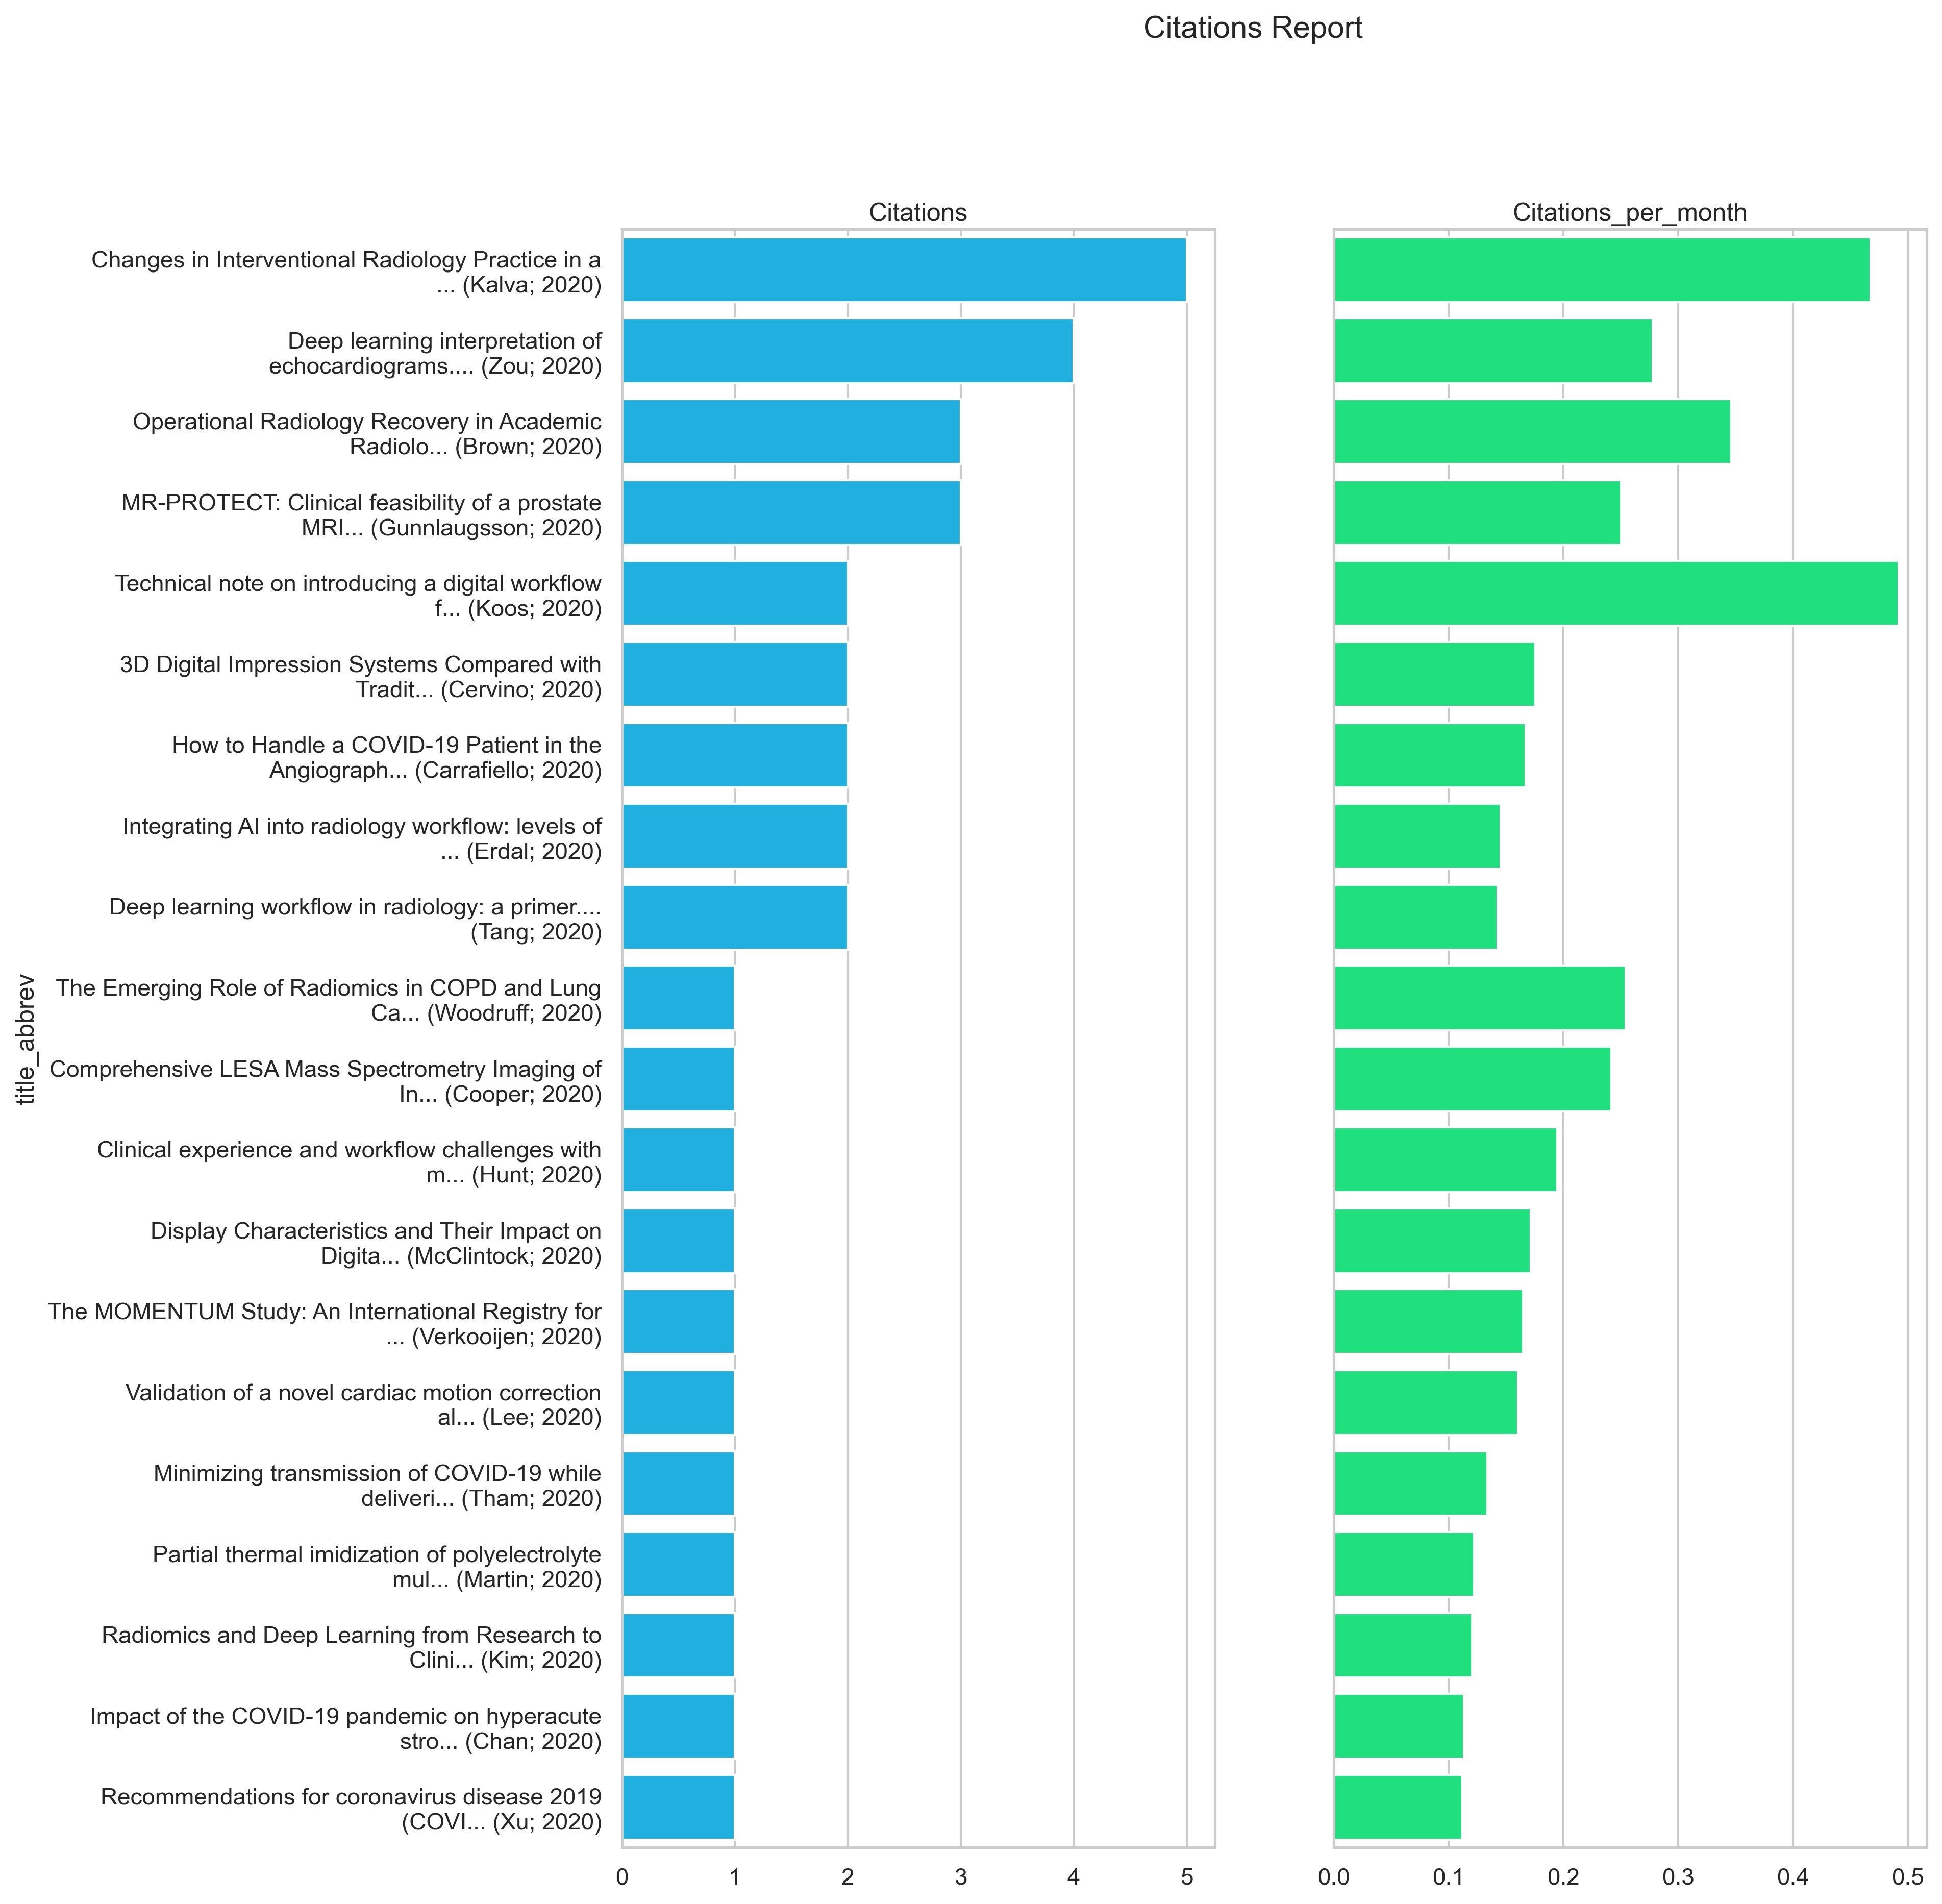

In [45]:
cites_per_pub_df = PR.citations_per_publication(publications_df=publications_df, 
                                                citations_df=citations_df, 
                                                title="Citations Report",
                                                include_query=False,
                                                top_n=20, 
                                                output_path=resultsURL,
                                                interactive=False ) 
cites_per_pub_df = cites_per_pub_df.drop_duplicates(subset=["publication_pmid"], keep='first')

### Sort by Citations per month

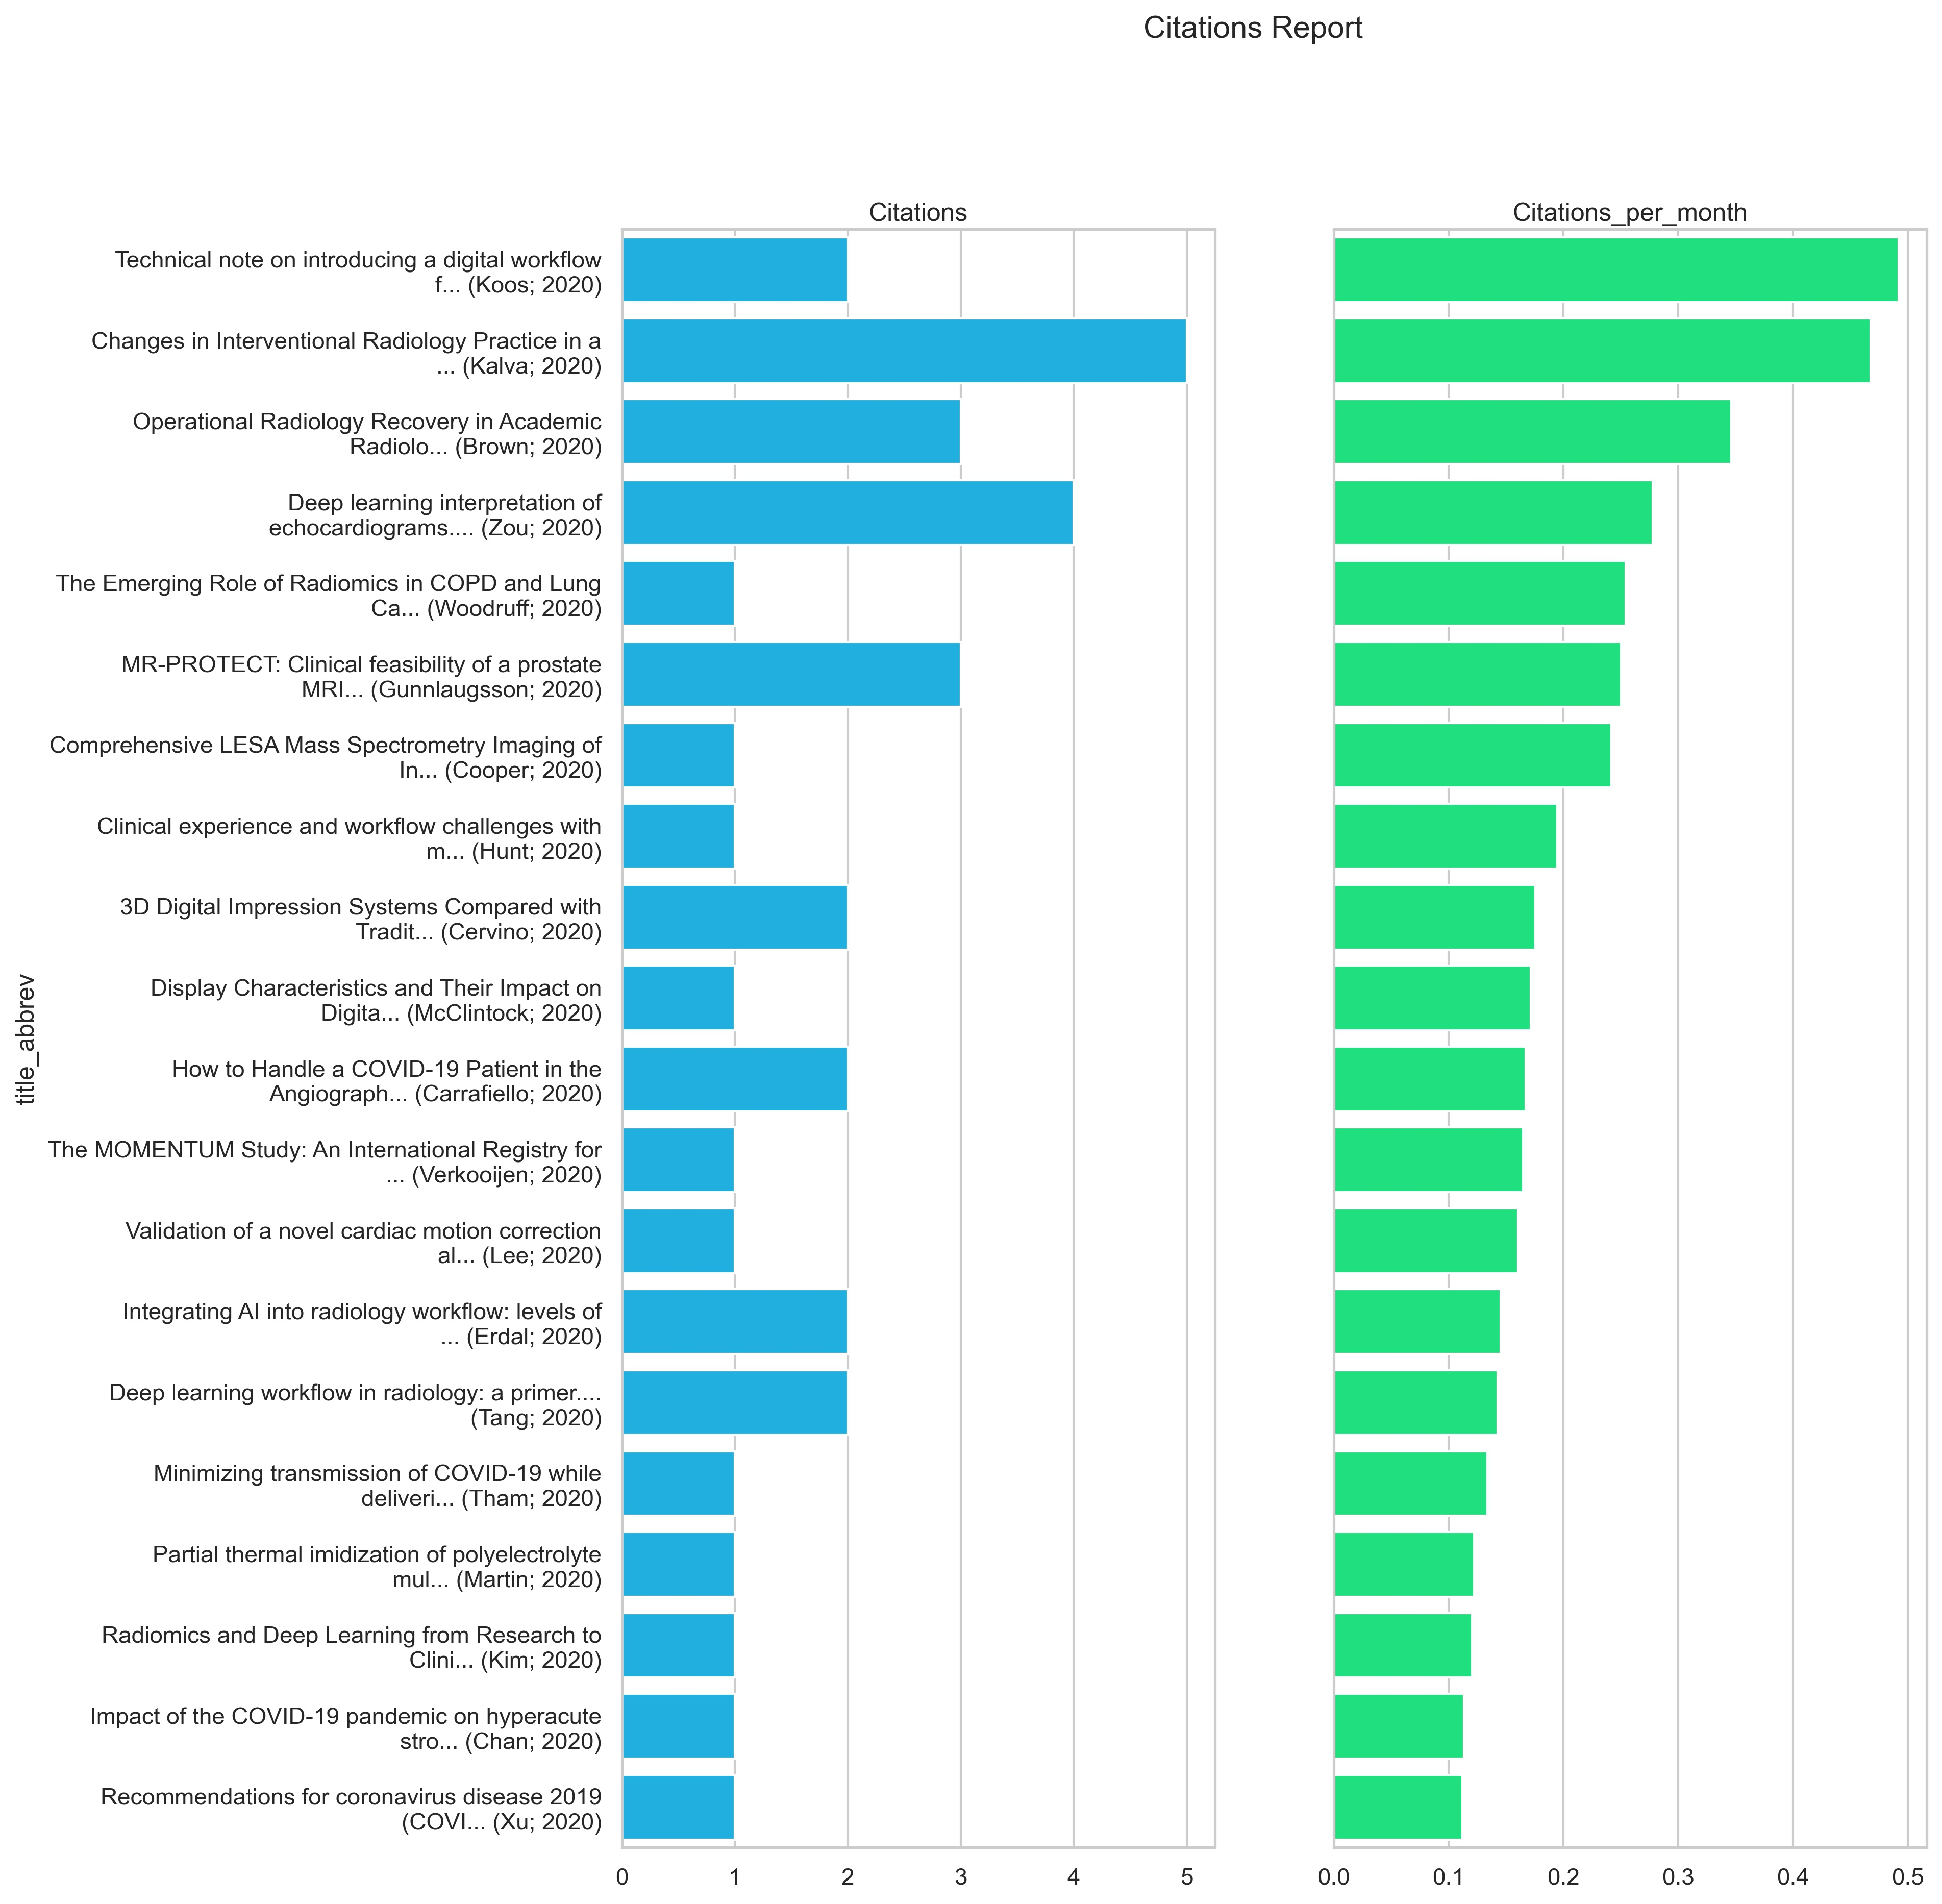

In [47]:
cites_per_pub_report = PR.citations_per_publication(publications_df, citations_df, 
                                                title="Citations Report",
                                                include_query=False,
                                                sort_method="time_scaled",
                                                top_n=20, 
                                                interactive=False,
                                                write_file=False ) 

In [48]:
PR.download_link(file_path=resultsURL+"CitationsPerPublication.csv.gz")

In [49]:
display(cites_per_pub_df.head(10))

publication_pmid                         DOI  \
18          32425709  10.1016/j.jacr.2020.05.005   
40          31993508   10.1038/s41746-019-0216-8   
8           32682744  10.1016/j.jacr.2020.07.004   
27          32272943  10.1186/s13014-020-01513-7   
43          31973720   10.1186/s12903-020-1001-4   
24          32340384          10.3390/ma13081982   
26          32277272  10.1007/s00270-020-02476-8   
33          32064302    10.1117/1.JMI.7.1.016502   
35          32040647   10.1186/s13244-019-0832-5   
42          31991420           10.1159/000505429   

                                                title  \
18  Changes in Interventional Radiology Practice i...   
40   Deep learning interpretation of echocardiograms.   
8   Operational Radiology Recovery in Academic Rad...   
27  MR-PROTECT: Clinical feasibility of a prostate...   
43  Technical note on introducing a digital workfl...   
24  3D Digital Impression Systems Compared with Tr...   
26  How to Handle a COVID-19 Patient in the Angiog...   
33  Integrating AI into radiology workflow: levels...   
35     Deep learning workflow in radiology: a primer.   
42  The Emerging Role of Radiomics in COPD and Lun...   

                                             abstract  \
18                                                NaN   
40  Echocardiography uses ultrasound technology to...   
8   This article presents a current snapshot in ti...   
27  Retrospective studies on MRI-only radiotherapy...   
43  Advanced digital workflows in orthodontics and...   
24  The advent of new technologies in the field of...   
26  This is a single-center report on coordination...   
33  We present a roadmap for integrating artificia...   
35  Interest for deep learning in radiology has in...   
42  Medical imaging plays a key role in evaluating...   

                                              authors  \
18  Alexis M Cahalane;;Jie Cui;;Robert M Sheridan;...   
40  Amirata Ghorbani;;David Ouyang;;Abubakar Abid;...   
8   Daniel S Siegal;;Brooke Wessman;;Jessica Zador...   
27  Emilia Persson;;Christian Jamtheim Gustafsson;...   
43  Alexander B Xepapadeas;;Christina Weise;;K Fra...   
24  Marco Cicciù;;Luca Fiorillo;;Cesare D'Amico;;D...   
26  Anna Maria Ierardi;;Bradford J Wood;;Chiara Ga...   
33  Engin Dikici;;Matthew Bigelow;;Luciano M Preve...   
35  Emmanuel Montagnon;;Milena Cerny;;Alexandre Ca...   
42  Turkey Refaee;;Guangyao Wu;;Abdallah Ibrahim;;...   

                last_author  \
18         Sanjeeva P Kalva   
40              James Y Zou   
8            Manuel L Brown   
27  Adalsteinn Gunnlaugsson   
43                   B Koos   
24         Gabriele Cervino   
26    Gianpaolo Carrafiello   
33         Barbaros S Erdal   
35                  An Tang   
42         Henry C Woodruff   

                                         affiliations  \
18  Director of Interventional Nephrology, Massach...   
40  1Department of Electrical Engineering, Stanfor...   
8   Vice Chair of Radiology, Henry Ford Hospital, ...   
27  Radiation Physics, Department of Hematology, O...   
43  Department of Orthodontics, University Hospita...   
24  Department of Biomedical and Dental Sciences a...   
26  Radiology Department, Fondazione IRCCS Cà Gran...   
33  The Ohio State University College of Medicine,...   
35  Centre de recherche du Centre Hospitalier de l...   
42  The D-Lab, Department of Precision Medicine, G...   

                                              journal  \
18  Journal of the American College of Radiology :...   
40                               NPJ digital medicine   
8   Journal of the American College of Radiology :...   
27               Radiation oncology (London, England)   
43                                    BMC oral health   
24                     Materials (Basel, Switzerland)   
26        Cardiovascular and interventional radiology   
33     Journal of medical imaging (Bellingham, Wash.)   
35                              Insights into imaging   
42  Res

## Highly-Cited Journals
- Identify the journals which these publications get cited the most.

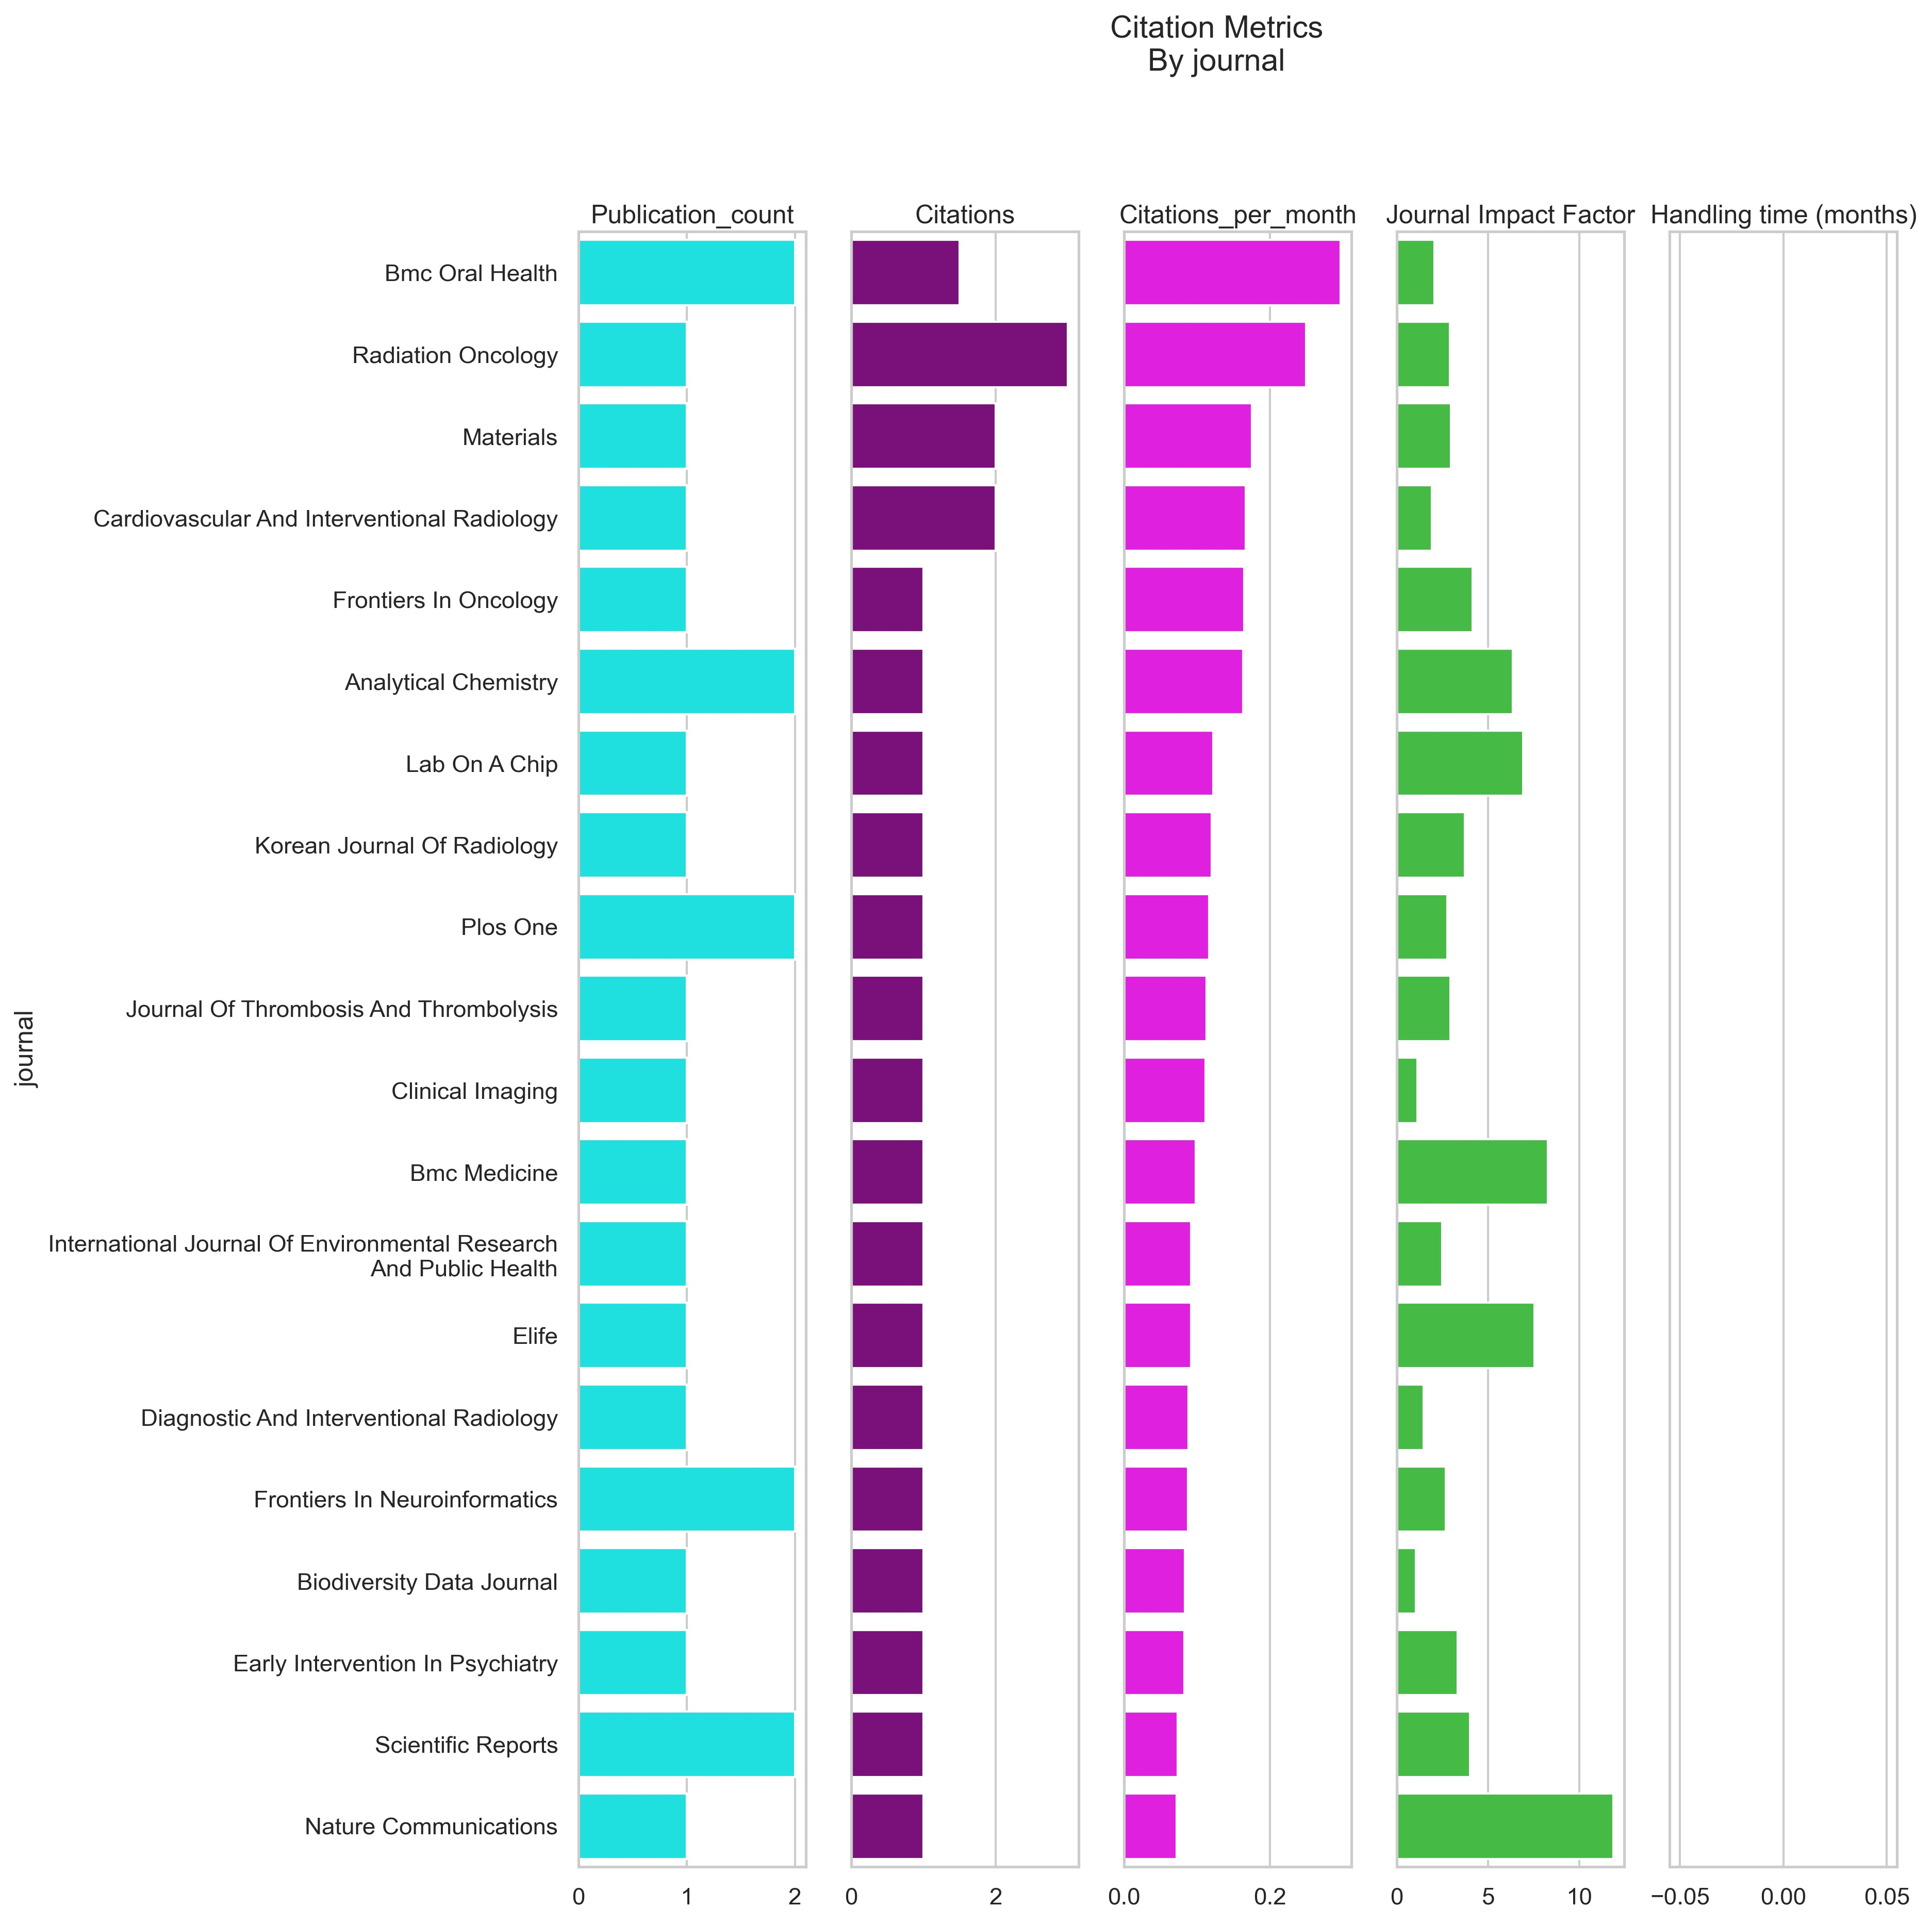

journal  Publication_count  \
0                                     Bmc Oral Health                  2   
5                                  Radiation Oncology                  1   
6                                           Materials                  1   
7         Cardiovascular And Interventional Radiology                  1   
8                               Frontiers In Oncology                  1   
1                                Analytical Chemistry                  2   
9                                       Lab On A Chip                  1   
10                        Korean Journal Of Radiology                  1   
2                                            Plos One                  2   
11             Journal Of Thrombosis And Thrombolysis                  1   
12                                   Clinical Imaging                  1   
13                                       Bmc Medicine                  1   
14  International Journal Of Environmental Researc...                  1   
15                                              Elife                  1   
16            Diagnostic And Interventional Radiology                  1   
3                       Frontiers In Neuroinformatics                  2   
17                          Biodiversity Data Journal                  1   
18                   Early Intervention In Psychiatry                  1   
4                                  Scientific Reports                  2   
19                              Nature Communications                  1   
20        Journal Of Applied Clinical Medical Physics                  1   
21      Advances In Experimental Medicine And Biology                  1   

    Citations  Citations_per_month  Total Cites  Journal Impact Factor  \
0         1.5             0.297272         2444                  2.048   
5         3.0             0.250000         5669                  2.895   
6         2.0             0.175439        18764                  2.972   
7         2.0             0.167131         5219                  1.928   
8         1.0             0.164835         8031                  4.137   
1         1.0             0.163341       133005                  6.350   
9         1.0             0.122449        31678                  6.914   
10        1.0             0.120482         2687                  3.730   
2         1.0             0.116979       650727                  2.776   
11        1.0             0.113208         2789                  2.941   
12        1.0             0.111940         2132                  1.136   
13        1.0             0.098361        13630                  8.285   
14        1.0             0.092025        20692                  2.468   
15        1.0             0.091743        37014                  7.551   
16        1.0             0.088235         1298                  1.464   
3         1.0             0.087428         2213                  2.680   
17        1.0             0.083102          458                  1.029   
18        1.0             0.082645         1630                  3.323   
4         1.0             0.073283       302086                  4.011   
19        1.0             0.072115       243793                 11.878   
20        1.0             0.071429         2517                  1.544   
21        1.0             0.070922        19627                  2.126   

    Eigenfactor Score  Handling time (months)  
0             0.00532                     NaN  
5             0.01298                     NaN  
6             0.03094                     NaN  
7             0.00784                     NaN  
8             0.02574                     NaN  
1             0.14974                     NaN  
9             0.04681                     NaN  
10            0.00480                     NaN  
2             1.70645                     NaN  
11            0.00586                     NaN  
12            0.00386                     NaN  
13            0.04

In [51]:
journals_df = PR.grouped_citations(cites_per_pub_df, 
                                   lst_col="journal", 
                                   top_n=20, 
                                   sort_order=["Citations_per_month", "Citations", "Publication_count"])
journals_df.to_csv(resultsURL+"Journals.csv.gz")
journals_df

In [52]:
PR.download_link(resultsURL+"Journals.csv.gz")

## Top Terms
- What are the most frequent terms within the title, abstract, and MeSH terms.

### Competitors' Publications

In [90]:
publications_wordFreq_other = PR.word_frequency_overall(publications_df)

+ Counting words...


## Top Authors  
- Get a list of authors that most commonly appear in these publications.

### Most Frequent Authors


### Remove competitors

Remove authors than have published with competitor companies, identified in [previous analyses](https://bschilder.github.io/PubReporter/Jupyter_Reports/Sirona/Sirona_PubMed_Report.html).

In [101]:
companies = pd.read_csv(baseURL+"company_list.csv")
company_names = "|".join(companies.Company.str.lower().tolist())
others_df = publications_df.loc[~publications_df.affiliations.str.lower().str.contains(company_names, na=False),:]
print(f'{others_df.shape[0]} / {publications_df.shape[0]}  publications remain after filtering.')

737 / 767  publications remain after filtering.


In [92]:
authors_otherPubs_df = PR.potential_collaborative_authors(publications_df, 
                                                          top_n=30, 
                                                          palette="autumn")

By Author


### Stanford University-affiliated authors

Find the most impactful researchers that are affiliated with or collaborate with Stanford University or Stanford Medical.

**Note**: Some authors may not have appointments at Stanford themselves (e.g.Michail Ignatiadis, Dylan Bannon), but frequently collaborate with Stanford researchers (e.g. Patrick G Mitchell, Wah Chiu).

In [116]:
authors_otherPubs_df = PR.potential_collaborative_authors(publications_df.loc[publications_df.affiliations.str.lower().str.contains("stanford"),:], 
                                                          top_n=10, 
                                                          interactive=True)

By Author


## Top Institutions
- This is a mixture of institutions, and institutions + authors because publications don't necessarily have a standard way of listing the affiliations.

### Most Frequent Institutions

In [112]:
institutions_otherPubs_df = PR.potential_collaborative_institutions(publications_df, 
                                                                    top_n=15, 
                                                                    height=10, 
                                                                    interactive=True, 
                                                                    wrap_labels=70)

Initializing PubReporter...
By Affiliation


### Stanford University-affiliated research groups

Find the most impactful labs/departments that are affiliated with or collaborate with Stanford University or Stanford Medical.

In [113]:
institutions_otherPubs_df = PR.potential_collaborative_institutions(publications_df.loc[publications_df.affiliations.str.lower().str.contains("stanford"),:], 
                                                           top_n=15, 
                                                          height=10,  
                                                          interactive=True)

By Affiliation


In [80]:
%%capture

# FROM COMMAND LINE (note the --execute flag)
# !jupyter nbconvert --to html_toc --execute Jupyter_Reports/Sirona/Sirona_Keyword_PubMed_Report.ipynb --no-input